In [1]:
import pandas as pd
import argparse
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Conditional Entropy H(Y|X) 
* All results are computed using the 10 repeat average.


* Note that `mess_prob=0.0` repesents original (unmodified) dataset...

## Character modification
* In the table below (and also in the plot) we can see, that modifying the characters leads to a linear decrease of the conditional entropy.

* When we modify characters of words, we are creating new words and thus making the vocabulary much larger. 


* Moreover we destroy the relationship between the words, because for example if in the original text we had "can of coke" 100 times, now we will probably end up each time with a different word, thus each combination of words $w_{i-1}, w_i$ will be more and more unique, because each word $w_i$ will start becoming more unique. 


* This means that $p(w_{i-1} w_{i})$ will go towards $1/|V|$ and $p(w_i | w_{i-1})$ will go to $1$, thus $\log_2 (p(w_i | w_{i-1})$ will more often be $0$ and the conditional entropy will be lower.

In [2]:
df = pd.read_csv("results/res.csv").sort_values(["dataset", "experiment", "mess_prob"], ascending = (True, True, True))
df['Experiment'] = df['dataset'] + ": " + df['experiment']
df['mess_prob'] = df['mess_prob'].astype('category')

In [6]:
p = df[df['experiment']=="char-modif"].pivot_table(index=["mess_prob"], 
                columns=['dataset'], 
                aggfunc=np.sum,
                values='avg_1')
p['cz_perplexity'] = p["cz"].apply(lambda x: np.power(2, x))
p['en_perplexity'] = p["en"].apply(lambda x:  np.power(2, x))
p

dataset,cz,en,cz_perplexity,en_perplexity
mess_prob,,,,
0.0,4.747801,5.287398,26.867694,39.053984
1e-05,4.747718,5.287392,26.866157,39.053815
0.0001,4.746771,5.287000,26.848525,39.043208
0.001,4.738600,5.283650,26.696888,38.952674
0.01,4.659225,5.250462,25.267749,38.066804
0.05,4.336144,5.057127,20.198049,33.292550
0.1,4.007994,4.731907,16.088900,26.573320


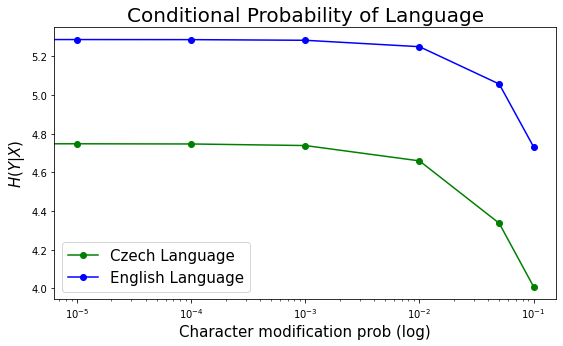

In [5]:
x = df[df['experiment']=="char-modif"]["mess_prob"].unique()

# plot
fig, ax = plt.subplots(1,1, figsize=(9,5))
ax.set_title('Conditional Probability of Language', fontsize=20)
ax.set_xlabel("Character modification prob (log)", fontsize='15')
ax.set_ylabel("$H(Y|X)$", fontsize='15')

l, = ax.plot(x, p["cz"], 'o-g')
l.set_label("Czech Language")

l, = ax.plot(x, p["en"], 'o-b')
l.set_label("English Language")
ax.legend(prop={'size': 15})

ax.set_xscale('log')
plt.show()

## Word modification
* Contrary to character modification, when we are substituting the words, we are not making the vocabulary larger. But we are changing the distribution of words. Each substitution leads to the fact that this word is in this position with uniform probability. 


* Let's see the results first

In [6]:
p = df[df['experiment']=="word-modif"].pivot_table(index=["mess_prob"], 
                columns=['dataset'], 
                aggfunc=np.sum,
                values='avg_1')
p

dataset,cz,en
mess_prob,,
0.0,4.747801,5.287398
1e-05,4.747787,5.287406
0.0001,4.747751,5.287613
0.001,4.746902,5.289483
0.01,4.738953,5.306460
0.05,4.698919,5.380170
0.1,4.637736,5.459387


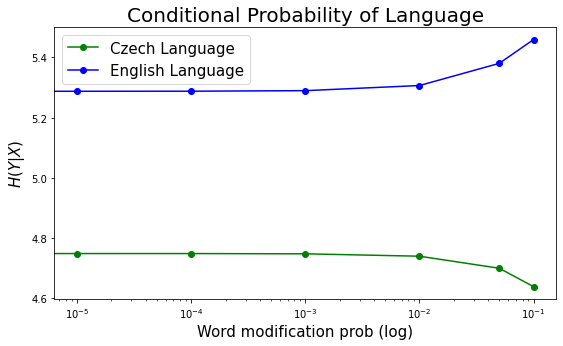

In [7]:
x = df[df['experiment']=="word-modif"]["mess_prob"].unique()

# plot
fig, ax = plt.subplots(1,1, figsize=(9,5))
ax.set_title('Conditional Probability of Language', fontsize=20)
ax.set_xlabel("Word modification prob (log)", fontsize='15')
ax.set_ylabel("$H(Y|X)$", fontsize='15')

l, = ax.plot(x, p["cz"], 'o-g')
l.set_label("Czech Language")

l, = ax.plot(x, p["en"], 'o-b')
l.set_label("English Language")
ax.legend(prop={'size': 15})

ax.set_xscale('log')
plt.show()

* I think that $p(w_{i-1} w_{i})$ will decrease for the most common word combinations.. because there is a high probability of modification of one of those two words (and result will uniformly random word.

* I though $p(w_i | w_{i-1})$ that will decrease, because now we will start having more and more random history for this word... and i=that it will tend to go to  $1/|V|$ ... so that the Entropy will be increasing ... and the distribution of the words will go towards the maximal entropy...


* But we can see, that this is the case only for English. For the Czech, it quite surprisingly decreases the entropy. My explanation is that this is happening because of the very large Czech dictionary. Let us see the stats about the languages... In the table, we have the size of the dataset, vocabulary size, number of different characters... and quantiles with counts of most common words...

In [8]:
df = pd.read_csv("results/lang-stats.csv")
df

,dataset,T,V,C,max,q25,q50,q75,q95
0,cz,222412,42826,117,13788,1,1,2,11
1,en,221098,9607,74,14721,1,2,7,56


* We can see that Czech vocabulary has $42826$ different words. Also half of the words are only single time in the dataset and even $75\%$ of words from the vocabulary is at most two times in the dataset.

* So if we randomly change $10\%$ of the words, we are changing about $22,241$ of the words. Most probably we will choose again and again some common words. 


* These words will be changed uniformly to some of $42,826$ different words. So there is a high chance that often we sample a very common word and substitute it with a word that was in the dataset only once or twice ... If this new changed 'rare' word $r$ is in the history e.g. $p(w_i | r_{i-1})$ then the probability will be very high  $1$ or $0.5$ .. thus this will lower the entropy.

* This is not the case for English, where is still a higher chance that a new word was at least multiple times in the dataset.

# Per-word contribution to Conditional Entropy  $H(Y=y|X), y \in \mathcal{Y}$
* I thought that it would also be interesting to see how individual words contribute to the conditional entropy.


* In the following table, we will find maximum, minimum, average, and quantiles for $H(Y=y|X)$ for different modification probabilities.


* First table and plot are for character modification. The second table and plot are for word modification.


* For the character modification we can see, that all words reduce their contribution to the conditional entropy quite linearly. We can also see that some words contribute a lot (common words) but most words contribute a little.


* For the word modification, we can see, that for English the skew of the distribution is changing and that the more we change words uniformly randomly to other words, the mean per-word contribution to the conditional entropy is getting closer to 0.5 quantile. For Czech, this is happening also, but too little.

In [9]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [12]:
df = pd.read_csv("results/res.csv").sort_values(["dataset", "experiment", "mess_prob"], ascending = (True, True, True))
df['Experiment'] = df['dataset'] + ": " + df['experiment']
df['mess_prob'] = df['mess_prob'].astype('category')

In [13]:
df["MEAN"] = df["avg_1"]
df["Q25"] = df["avg_1"]
df["Q75"]  =df["avg_1"]
df["MAX"] =df["avg_1"]


r = df[df['experiment']=="char-modif"].pivot_table(index=["mess_prob"], 
                columns=['dataset'], 
                aggfunc={'MEAN' : np.mean, 
                         'Q25' : lambda x: np.percentile(x, 25),
                         'Q75' : lambda x: np.percentile(x, 75),
                         'MAX' : np.max},
                #values='word_entropy'
              )

r.style.apply(highlight_max)

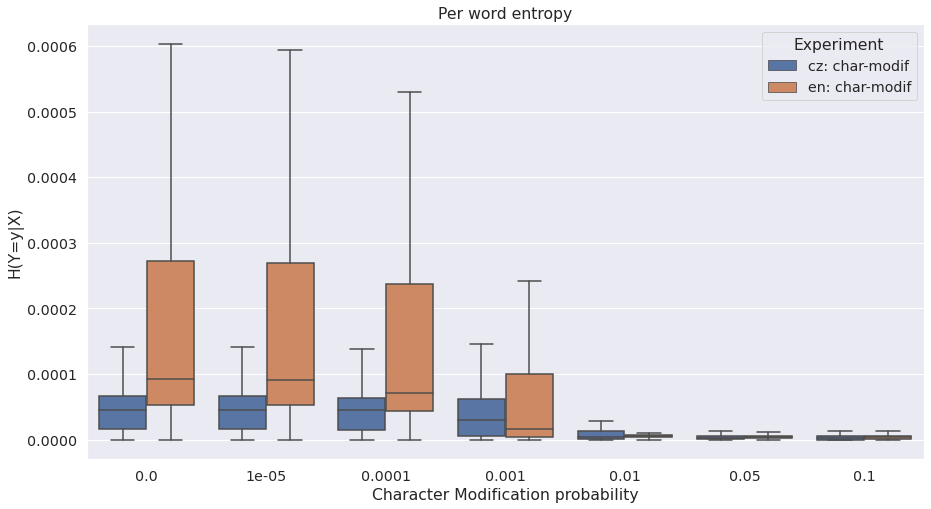

In [14]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":20,"axes.fontsize":20})  
sns.set(font_scale=1.3)  # crazy big
ax = sns.boxplot(x="mess_prob", y="avg_1",  hue="Experiment", data=df[df['experiment']=="char-modif"], showfliers = False, )
_ = ax.set(xlabel="Character Modification probability", ylabel = "H(Y=y|X)", title="Per word entropy")

In [15]:
r = df[df['experiment']=="word-modif"].pivot_table(index=["mess_prob"], 
                columns=['dataset'], 
                aggfunc={'MEAN' : np.mean, 
                         'Q25' : lambda x: np.percentile(x, 25),
                         'Q75' : lambda x: np.percentile(x, 75),
                         'MAX' : np.max},
                #values='word_entropy'
              )

r.style.apply(highlight_max)

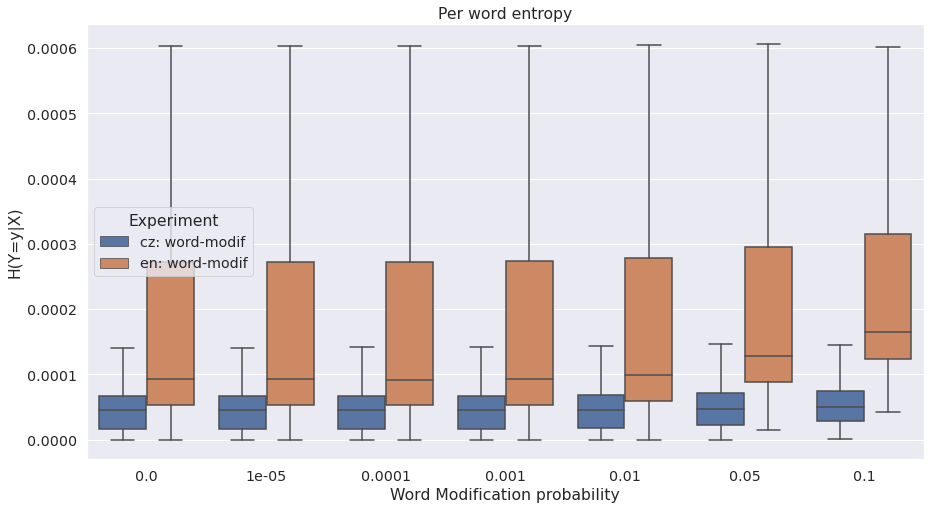

In [16]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":20,"axes.fontsize":20})  
sns.set(font_scale=1.3)  # crazy big
ax = sns.boxplot(x="mess_prob", y="avg_1",  hue="Experiment", data=df[df['experiment']=="word-modif"], showfliers = False, )
_ = ax.set(xlabel="Word Modification probability", ylabel = "H(Y=y|X)", title="Per word entropy")

We can also show those words, which contribute to conditional entropy the highest. Result is not suprsing ...

In [17]:
char_mod = df[df["experiment"] == "char-modif"]
cz_char = char_mod[char_mod["dataset"] == "en"]
cz_char_00 = cz_char[cz_char["mess_prob"] == 0.0]
print("English")
cz_char_00.sort_values(["avg_1"], ascending = (False))[["word", "avg_1"]].head(8)

English


,word,avg_1
1713947,",",0.146136
1713956,the,0.143909
1713958,of,0.083818
1713955,in,0.080007
1713964,and,0.073680
1713941,.,0.068793
1714039,a,0.061798
1713968,to,0.050796


In [18]:
char_mod = df[df["experiment"] == "char-modif"]
cz_char = char_mod[char_mod["dataset"] == "cz"]
cz_char_00 = cz_char[cz_char["mess_prob"] == 0.0]
print("Czech")
cz_char_00.sort_values(["avg_1"], ascending = (False))[["word", "avg_1"]].head(8)

Czech


,word,avg_1
15,",",0.107800
1,.,0.101425
120,v,0.056312
53,a,0.047288
142,"""",0.040737
46,se,0.040549
80,na,0.035754
18,-,0.025175


# Paper and Pen excersise
- Assume languages,$ L_1$  and $L_2$  which do not share any vocabulary items
    - $H(J|I) = E$   for $T_1$ in laguage $L_1$  and also for $T_2$  in $L_2$
    - now we create text $T_1 T_2$.
    - What will be the $H(J|I)$ ?

* **Lets split it by all possible cases...**
* $H(J|I)$ where $J,I\in T_1$  will be $E$ (by definition)

* $H(J|I)$ where $J,I\in T_2$ will  be $E$ also (by definition)
  * NOTE: There is single change for first word in  $T_2$  
  * It was $P(S,t_1) \log_2 P(t_1|S)$ where S is starting symbol
  * but $P(t_1|S)$ was equal to 1 ... so $\log(P(t_1|S)=0$

* $H(J|I)$ where $I\in T_2$, $J\in T_1$  is $0$ because $P(i,j)=0$  for all such words

* $H(J|I)$ where $I\in T_1$, $J\in T_2$ will be 0 except...
  * $P(t^1_{n}t^2_{1}) P(t^2_{1}|t^1_{n})$  where $t_n^1$ is last word in text $ T_1 $  and $t^2_1$  if first word from text $T_2$.
  * In this case we get $P(i,j)=1$ and $P(j|i)\geq 0$

* So we can conclude that conditional entropy of $T_1T_2$  will be $2E + P(t^2_{1}|t^1_{n})$.